# **Digital House - Data Science** - Comisión 112

# **TRABAJO FINAL** - GRUPO 9

# Integrantes

- Ana Belén Alonso
- Alan Gueret
- Daniel Carrillo
- Fabricio Di Palma



*Fecha: 26/01/2023*

### Objetivo del trabajo ###

En este trabajo necesitamos predecir si tendremos Churn o no (abandono) sobre una gran base de datos de 
clientes bancarios.
Esta base posee 10.000 registros y 12 features.

A continuación se verá un análisis de los datos, el procesamiento de estos en gráficos, el equilibrio
o balanceo sobre las clases (0 no abandono, 1 abandono) y el uso de modelos de aprendizaje automático
para lograr nuestro objetivo de predecir el churn.

In [7]:
### Libraries ###

# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
from IPython.display import Image
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt

# Pre - processing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Modelling 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


# Validation
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
import sklearn.metrics as metrics

# Balancing
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss



In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [4]:
# Importamos csv

#data = pd.read_csv('/content/drive/MyDrive/3. Academia/4. Data Science - Digital House/Desafios_Grupo_9/4. Desafio final/bank_churn.csv', sep = ',') # Direccion fabricio

#data = pd.read_csv('/content/drive/MyDrive/Data Science/bank_churn.csv', sep = ',') # Direccion Dani

#data = pd.read_csv('/content/drive/MyDrive/PROGRAMACION/Copia de bank_churn.csv', sep = ',') # Direccion Ana




In [5]:
data_location = "C:/Users/Danii/OneDrive/Documents/Dani Carrillo/Facultad/DATA SCIENCE/TP/bank_churn.csv"

data = pd.read_csv(data_location)

data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

**ANALISIS DESCRIPTIVO Y LIMPIEZA DE DATOS**

---

**DESCRIPCIÓN DE LAS COLUMNAS**

1. Customer_id: ID de cliente
2. Credit_score: Puntaje de crédito
3. Country: País
4. Gender: Género
5. Age: Edad
6. Tenure: Tiempo trascurrido desde que obtuvo un producto (años)
7. Balance: Balance
8. Products_number: Cantidad de productos
9. Credit_card: Si el usuario posee o no Tarjeta de Crédito.
10. Active_member: Si el cliente es activo o no.
11. Estimated_salary: Salario estimado
12. Churn: Si el cliente abandonó o no.

In [6]:
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
# Analizamos el dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Verificamos en codigo que no tenga null

print(data.isnull().sum()/data.shape[0])
print('verificamos que el dataframe no tiene valores nulos')


customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64
verificamos que el dataframe no tiene valores nulos


In [9]:
# Cantidad de filas y columnas
print('La cantidad de filas es:', data.shape[0])
print('La cantidad de columnas es:', data.shape[1])

La cantidad de filas es: 10000
La cantidad de columnas es: 12


In [10]:
# Seguimos revisando el dataframe...
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
# Revisamos si tenemos valores duplicados

print('Verificamos si tenemos valores duplicados:')
print('\n')
print('La cantidad de registros duplicados es de:', data.duplicated(subset=['customer_id']).sum())



Verificamos si tenemos valores duplicados:


La cantidad de registros duplicados es de: 0


In [12]:
# Revisamos variables object
print('Armamos lista por compresión de variables object')

columns_object = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] == 'object']



Armamos lista por compresión de variables object


C:\Users\Danii\AppData\Local\Temp\ipykernel_17932\3223403315.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  columns_object = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] == 'object']
C:\Users\Danii\AppData\Local\Temp\ipykernel_17932\3223403315.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  columns_object = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] == 'object']
C:\Users\Danii\AppData\Local\Temp\ipykernel_17932\3223403315.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [13]:
# Definimos tipos de variables 
print('Variables númericas:',['credit_score','balance','estimated_salary','age'])
print('Variables categóricas a binarizar:',columns_object)
print('Variables categóricas:',['tenure','products_number','credit_card','active_member'])

variables_numericas = ['credit_score','balance','estimated_salary','age']
variables_categoricas =['tenure','products_number','credit_card','active_member']

Variables númericas: ['credit_score', 'balance', 'estimated_salary', 'age']
Variables categóricas a binarizar: ['country', 'gender']
Variables categóricas: ['tenure', 'products_number', 'credit_card', 'active_member']


In [14]:
# Binarizamos las variables catogoricas 

#print(data.country.unique())
#print(data.gender.unique())

countrys_dummys = pd.get_dummies(data.country, prefix = 'country', drop_first = True)
gender_dummys = pd.get_dummies(data.gender, prefix = 'gender', drop_first = True)




In [15]:
# Hacemos un join de las columnas binarizadas 

data = data.join(countrys_dummys, how = 'inner')
data = data.join(gender_dummys, how = 'inner')

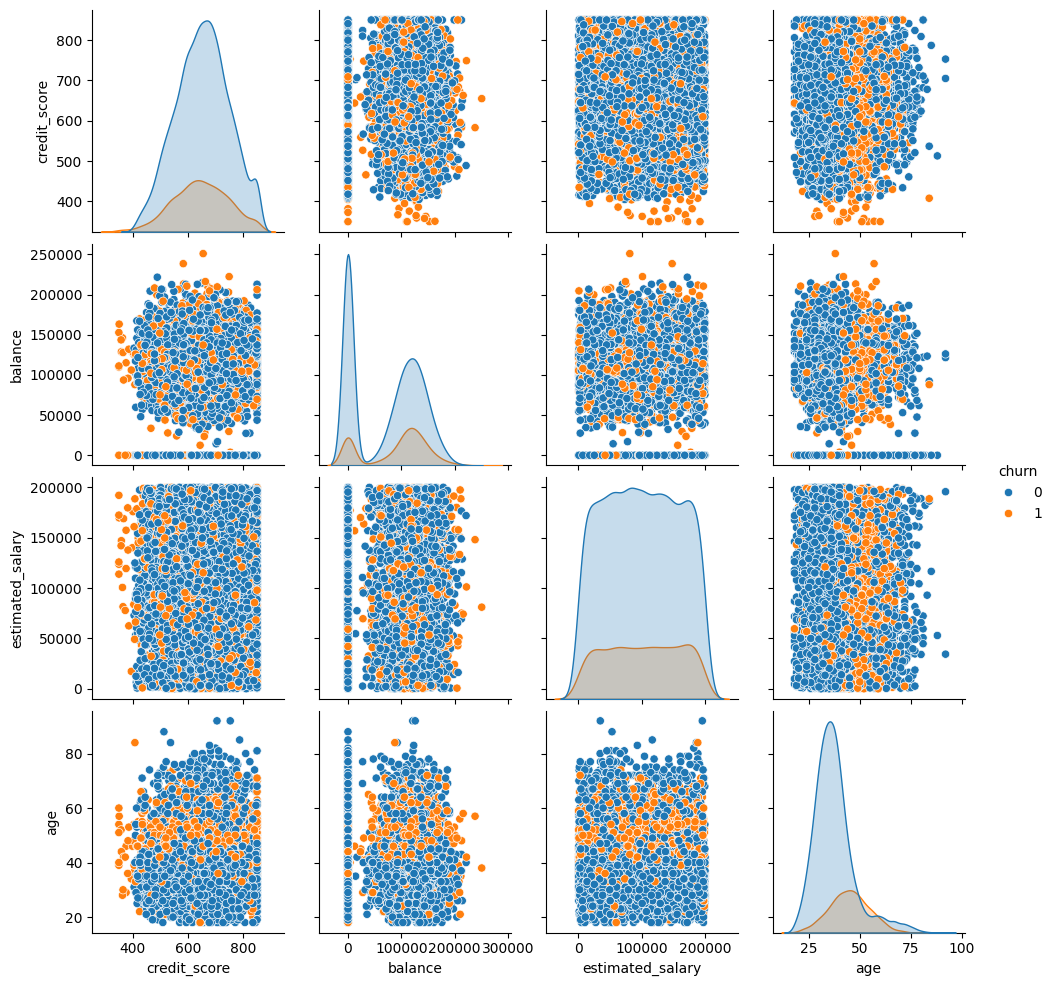

In [16]:
### Data Analysis

# Grafico de relación entre variables continuas discriminando por churn
sns.pairplot(data = data, x_vars = ['credit_score','balance','estimated_salary','age'],y_vars=['credit_score','balance','estimated_salary','age'], hue = 'churn')



<Axes: xlabel='active_member', ylabel='count'>

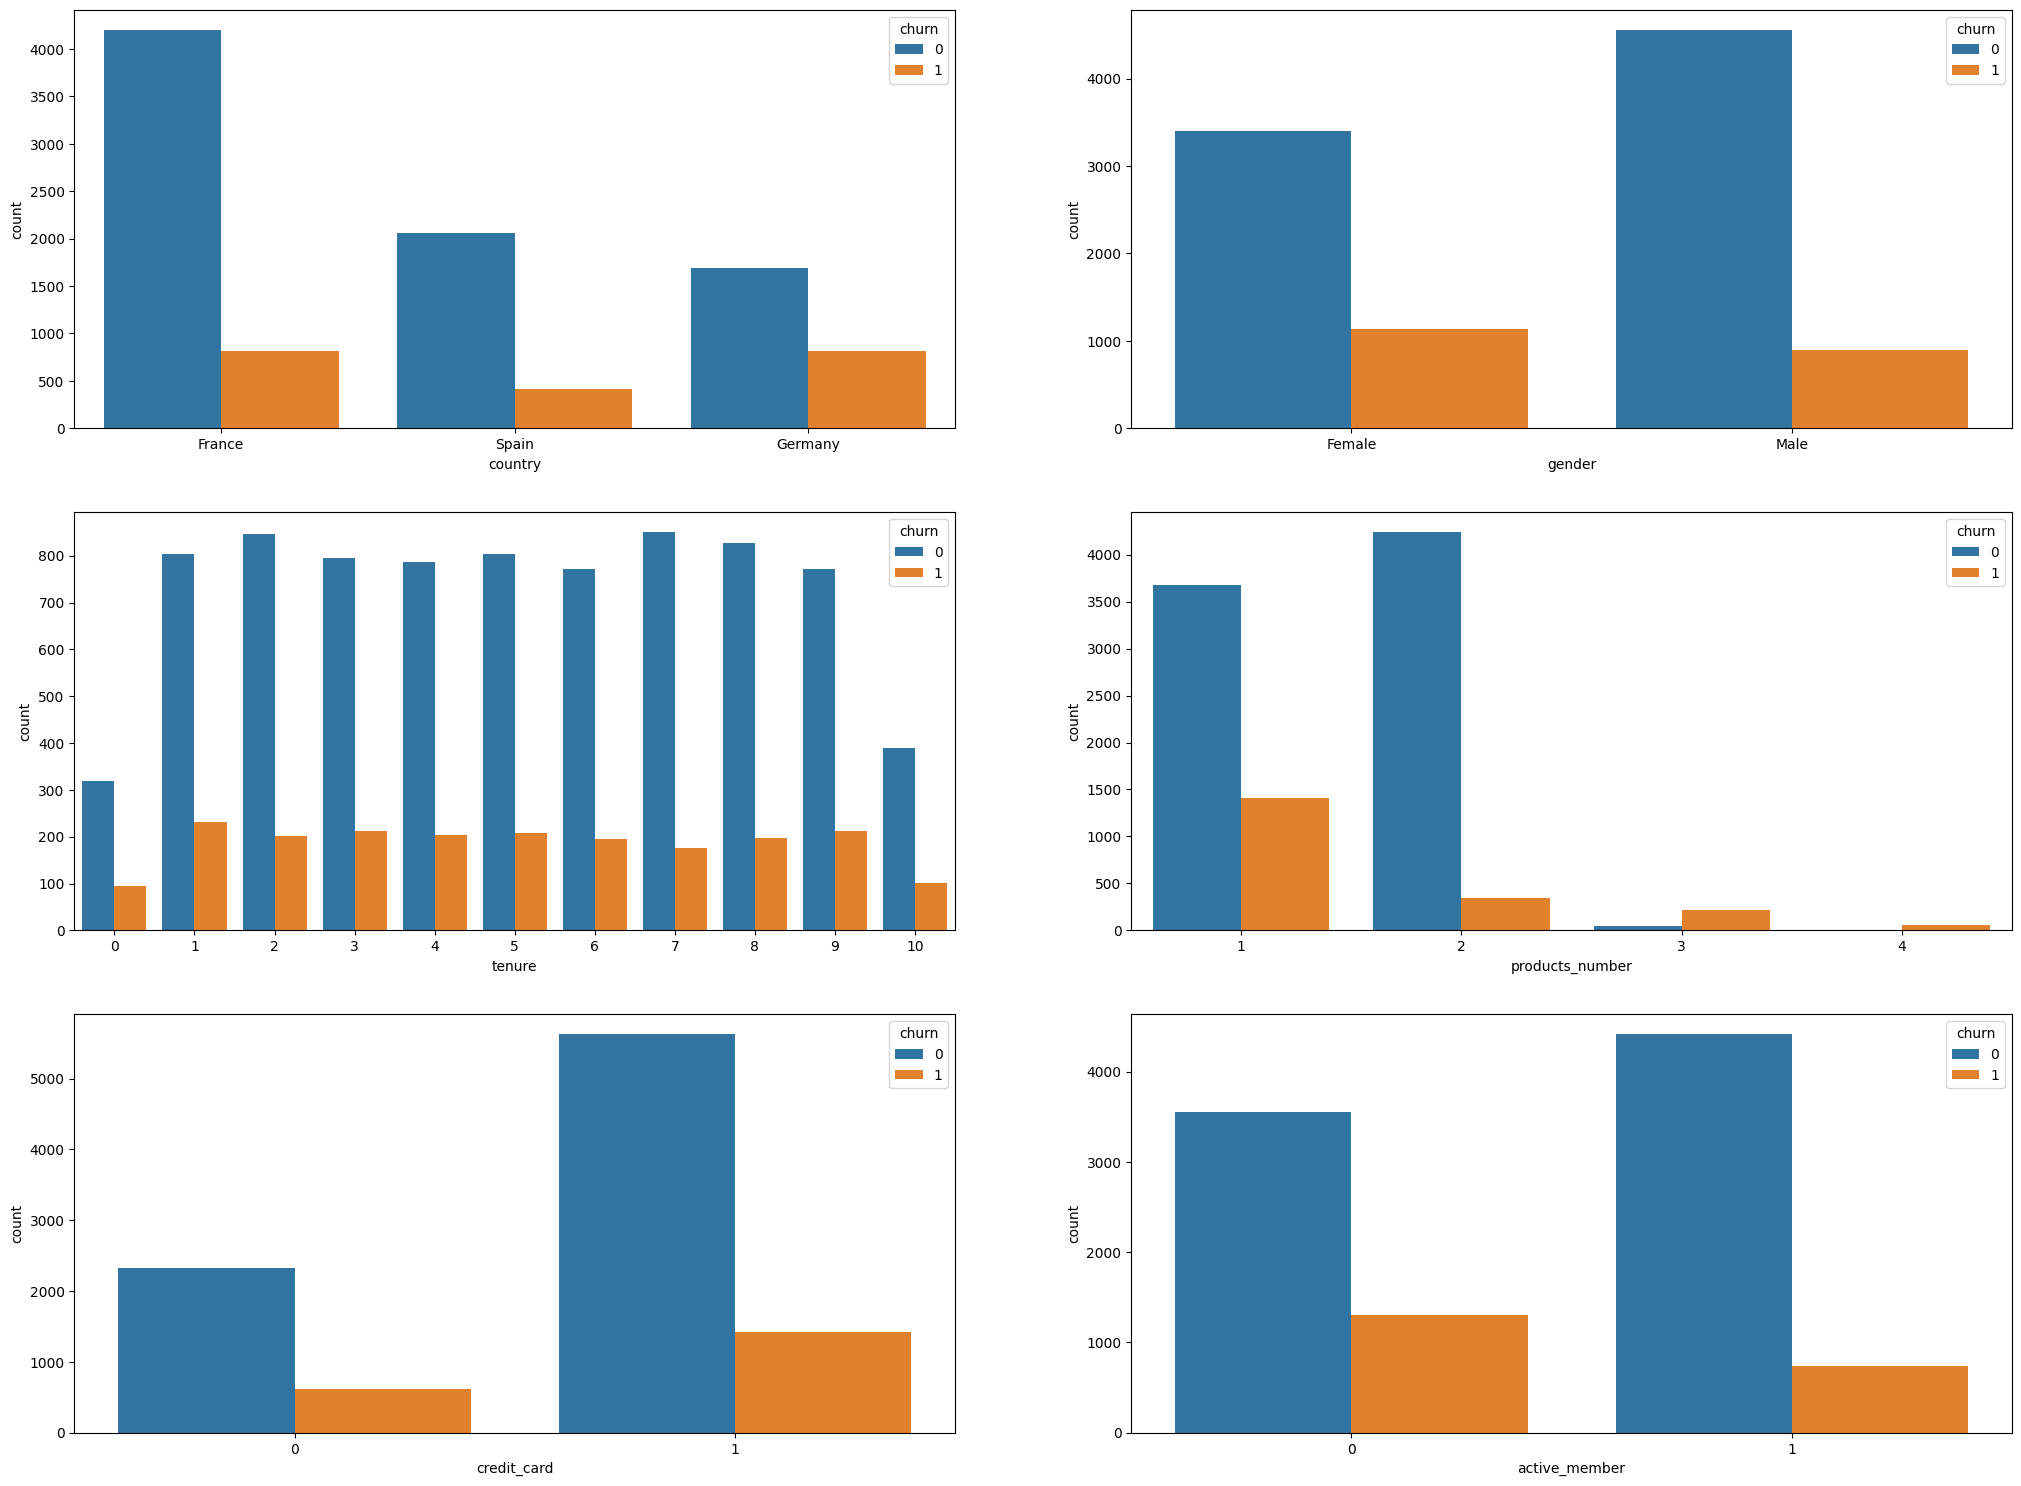

In [17]:
# Gráficos de variables categóricas (discriminando por churn)
plt.figure(figsize = (25,25))

#Country
plt.subplot(4,2,1)
sns.countplot(x = 'country',data = data, hue = 'churn')

#Gender
plt.subplot(4,2,2)
sns.countplot(x = 'gender',data = data, hue = 'churn')

#Tenure
plt.subplot(4,2,3)
sns.countplot(x = 'tenure',data = data, hue = 'churn')

#Products numers
plt.subplot(4,2,4)
sns.countplot(x = 'products_number',data = data, hue = 'churn')

#Credit card
plt.subplot(4,2,5)
sns.countplot(x = 'credit_card',data = data, hue = 'churn')

#Activate Member
plt.subplot(4,2,6)
sns.countplot(x = 'active_member',data = data, hue = 'churn')


In [18]:
# borro las columnas que son de tipo object 

data.drop(columns = columns_object, inplace = True) 



<Axes: xlabel='churn', ylabel='age'>

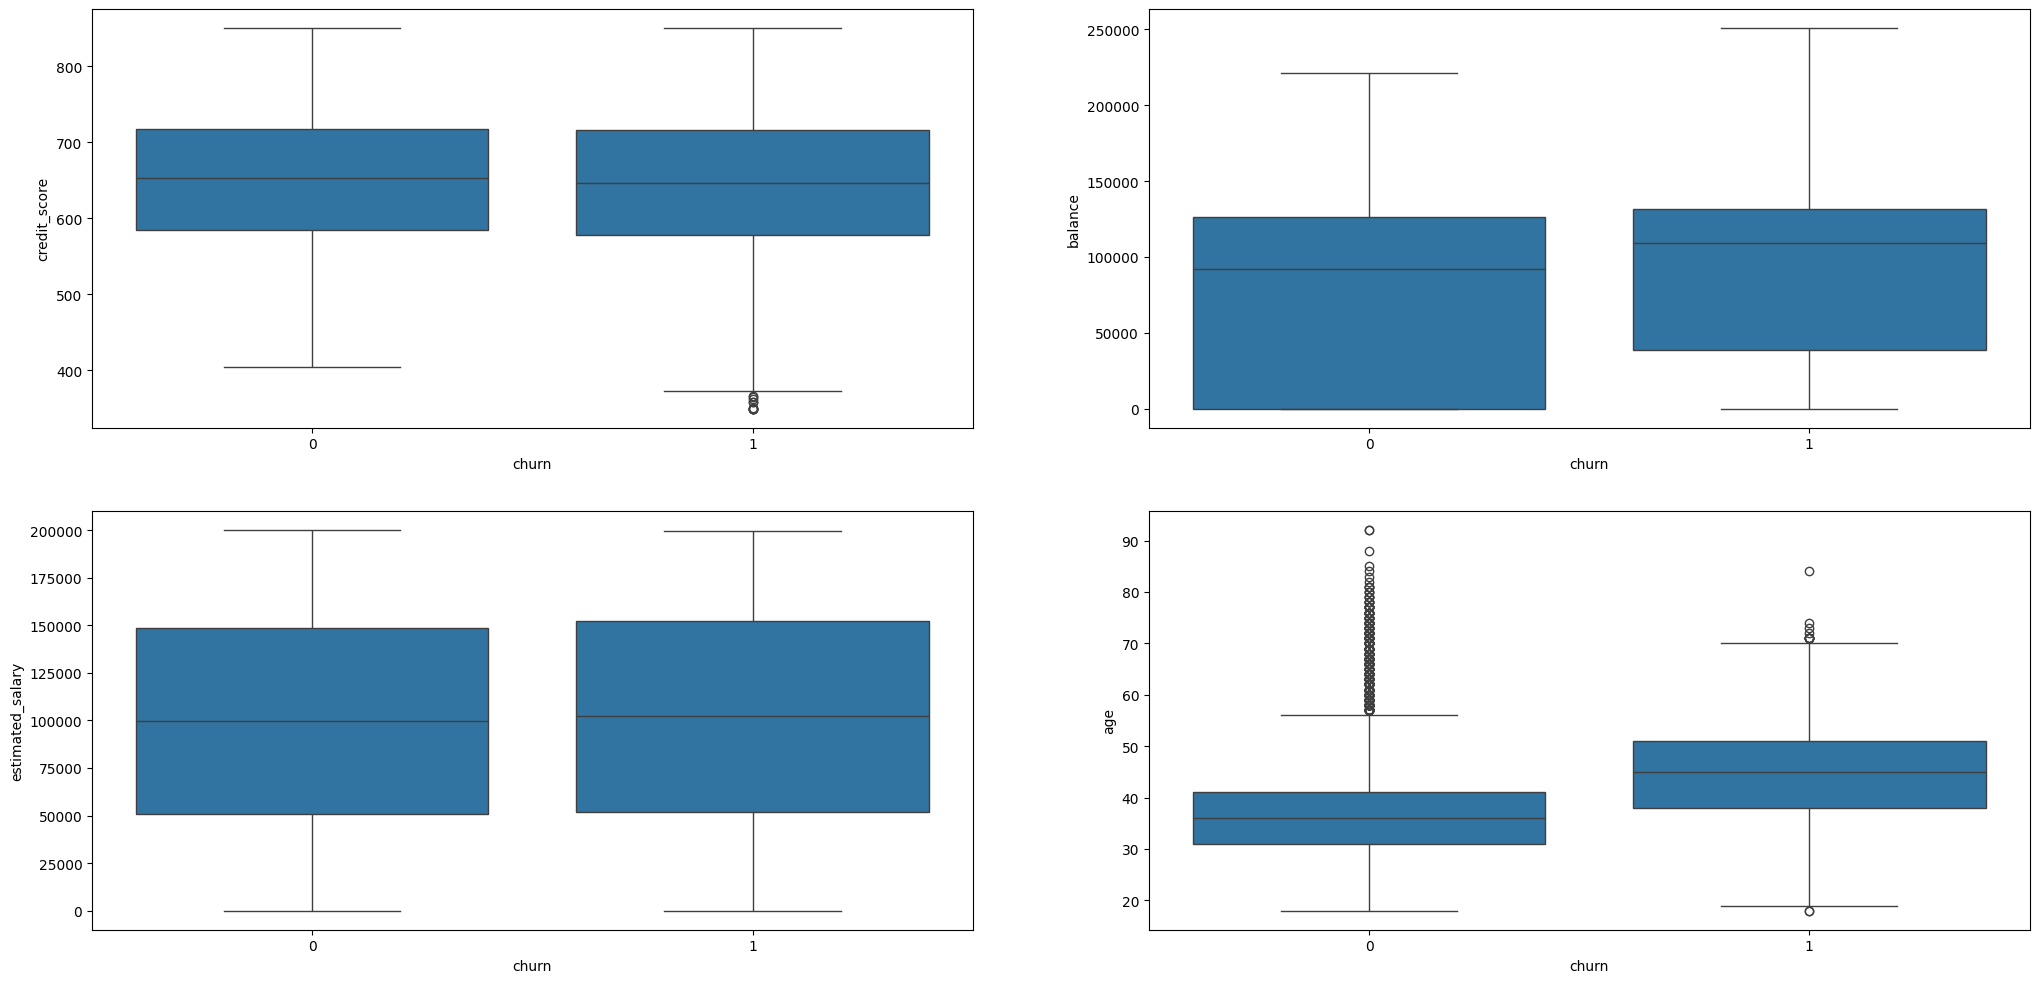

In [19]:
### Graficos de boxplot ###

plt.figure(figsize = (25,25))

#Credit Score
plt.subplot(4,2,1)
sns.boxplot(x = 'churn', y = 'credit_score' , data = data)

#Balance
plt.subplot(4,2,2)
sns.boxplot(x = 'churn', y = 'balance' , data = data)

#Estimated Salary
plt.subplot(4,2,3)
sns.boxplot(x = 'churn', y = 'estimated_salary' , data = data)

#Age
plt.subplot(4,2,4)
sns.boxplot(x = 'churn', y = 'age' , data = data)





In [20]:
print('Conclusiones:')
print('No hay diferencia entre el credit score y la chance de churn')
print('Clientes de mayor edad presentan mayores chances de churn')
print('Clientes que abandonan presentan una mediana ligeramente mayor en balance que quienen no lo hacen')
print('En estimated salary no hay muchas diferencia entre las chances de churn ')

Conclusiones:
No hay diferencia entre el credit score y la chance de churn
Clientes de mayor edad presentan mayores chances de churn
Clientes que abandonan presentan una mediana ligeramente mayor en balance que quienen no lo hacen
En estimated salary no hay muchas diferencia entre las chances de churn 


In [21]:
# Borramos customer_id por ser un dato irrelevante para el modelado
data.drop(columns= ['customer_id'], inplace = True)


Conclusión:
Analizamos la correlación de todas las variables con la variable churn (abandono), y vemos correlaciones vagas salvo la variable edad (age) con casi 30%.


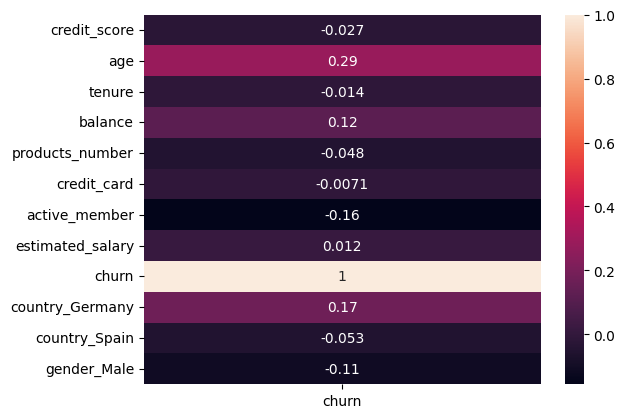

In [22]:
# Grafico correlaciones con el churn
sns.heatmap(data = data.corr()[['churn']], annot = True)
print("Conclusión:")
print("Analizamos la correlación de todas las variables con la variable churn (abandono), y vemos correlaciones vagas salvo la variable edad (age) con casi 30%.")

<Axes: >

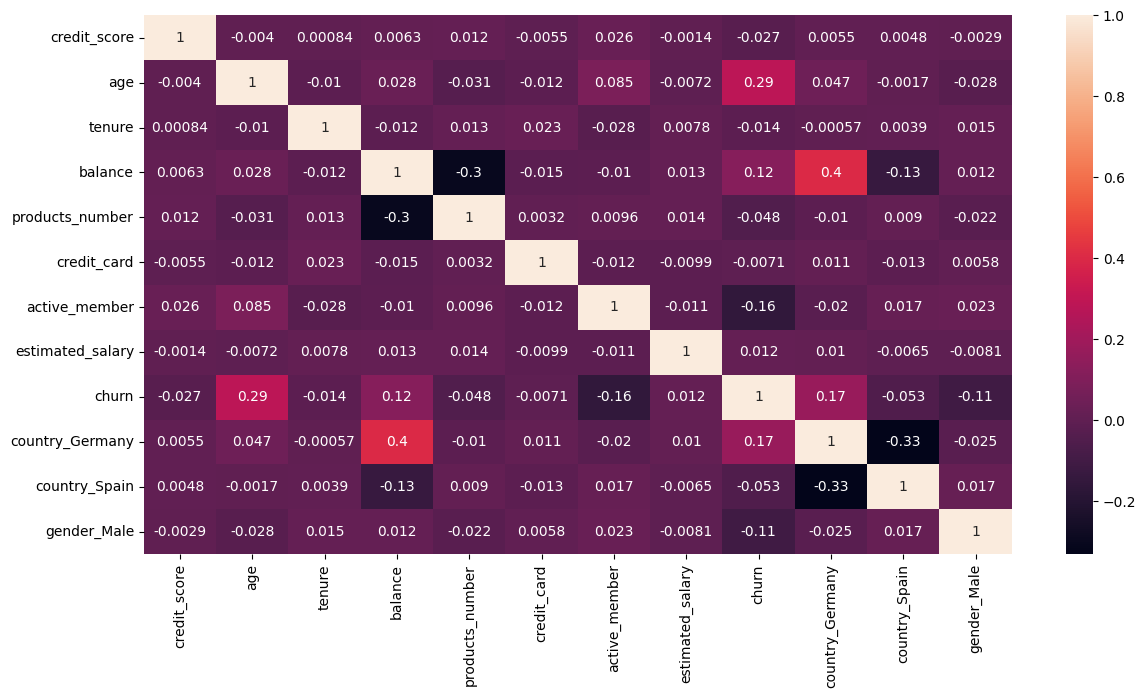

In [23]:
# Grafico correlaciones en el dataframe 
plt.figure(figsize = (14,7))
sns.heatmap(data = data.corr(), annot = True)

**ANALISIS BALANCE DE LA CATEGORÍA CHURN**


---



In [24]:
#Cuenta de categoría CHURN en porcentaje:
balanceo = round(data["churn"].value_counts() / data.shape[0],2)
print(f"en porcentaje, el {balanceo[0]} de los clientes no han abandonado la compañía y el {balanceo[1]} han abandonado la compañía")
print('Más adelante haremos un balanceo de nuestro vectores X e y')

en porcentaje, el 0.8 de los clientes no han abandonado la compañía y el 0.2 han abandonado la compañía
Más adelante haremos un balanceo de nuestro vectores X e y


**PREPARACIÓN DE LA MATRIZ PARA LOS MODELOS**

---



In [25]:
# Preparamos la matriz de features y el vector objetivo
X = data.drop(columns= ["churn"]) 
y = data.churn

In [26]:
# Realizamos el balanceo
ros = RandomOverSampler(random_state = 12) # Sobremuestro (aumento la clase 1)
#rus = RandomUnderSampler(random_state = 12) # SubMuestreo (disminuyo la clase 0)

X,y = ros.fit_resample(X,y)
#X,y = rus.fit_resample(X,y)
print('Usamos sobre muestro para no perder datos, ya que no contamos con tantos')

Usamos sobre muestro para no perder datos, ya que no contamos con tantos


churn
1    0.5
0    0.5
Name: count, dtype: float64


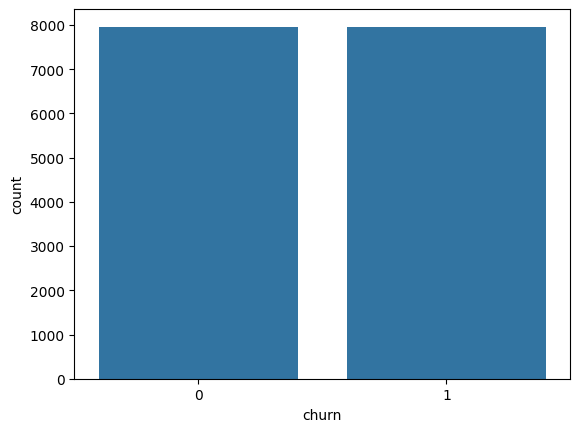

In [27]:
# Valido el balanceo 
print(y.value_counts() / y.shape[0])
ax = sns.countplot(x=y)



In [28]:
# Separamos en dataset de train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state= 12)

In [29]:
# Verificamos que las proporciones coincidan
y_train.mean(), y_test.mean()

(0.5, 0.5)

In [30]:
# Estandarizamos la matriz de features

scaler = StandardScaler()
robust = RobustScaler()
MinMax = MinMaxScaler()

# StandardScaler
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Robust (elimina outliers)
X_train_robust = robust.fit_transform(X_train)
X_test_robust = robust.transform(X_test)

# MinMax
X_train_minmax = MinMax.fit_transform(X_train)
X_test_minmax = MinMax.transform(X_test)


**MODELO 1 - NAIVE BAYES**

---

In [31]:
# Entrenamos el modelos base
naive = GaussianNB()

naive.fit(X_train, y_train)


GaussianNB()

In [32]:
# Calculamos los valores predichos en probabilidades y categorias
y_test_pred_naive = naive.predict(X_test)
y_test_pred_prob_naive = naive.predict(X_test)


In [33]:
# Calculamos la métricas de evaluación del modelo base
print(classification_report(y_test,y_test_pred_naive))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      2389
           1       0.71      0.65      0.68      2389

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778



In [34]:
# Entrenamos el modelo con las distintas formas de estandarizar

naive_scaler = naive.fit(X_train_scaler,y_train) # scaler
naive_robust = naive.fit(X_train_robust,y_train) # robust
naive_minmax = naive.fit(X_train_minmax,y_train) # minmax

In [35]:
# Calculamos los valores predichos

#Scaler
y_pred_naive_scaler = naive_scaler.predict(X_test_scaler)
y_pred_proba_naive_scaler = naive_scaler.predict_proba(X_test_scaler)

#Robust
y_pred_naive_robust = naive_robust.predict(X_test_robust)
y_pred_proba_naive_robust = naive_robust.predict_proba(X_test_robust)

#MinMax
y_pred_naive_minmax = naive_minmax.predict(X_test_minmax)
y_pred_proba_naive_minmax = naive_minmax.predict_proba(X_test_minmax)

In [36]:
# Revisamos el recall de cada modelo
print("El recall del modelo es con estandarización scaler es:",round(recall_score(y_test,y_pred_naive_scaler),2))
print("El recall del modelo es con estandarización robust es:",round(recall_score(y_test,y_pred_naive_robust),2))
print("El recall del modelo es con estandarización minmax es:",round(recall_score(y_test,y_pred_naive_minmax),2))


El recall del modelo es con estandarización scaler es: 0.87
El recall del modelo es con estandarización robust es: 0.72
El recall del modelo es con estandarización minmax es: 0.68


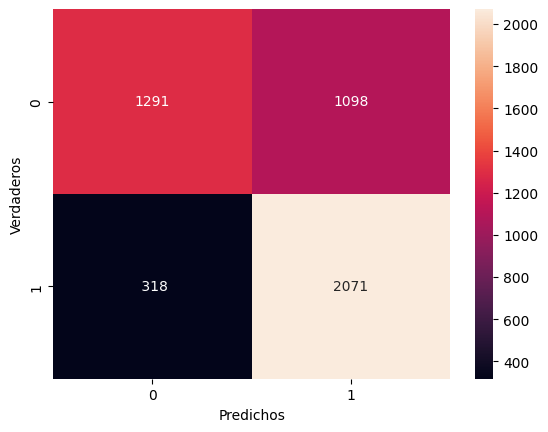

In [37]:
# Obtenemos la matriz de confusión del modelo con estandarización scaler por tener el mejor recall
matriz_confusion = confusion_matrix(y_test,y_pred_naive_scaler)

sns.heatmap(matriz_confusion, annot=True, fmt = "4d")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [38]:
# La métricas de evaluación son:
print(classification_report(y_test,y_pred_naive_scaler))

              precision    recall  f1-score   support

           0       0.80      0.54      0.65      2389
           1       0.65      0.87      0.75      2389

    accuracy                           0.70      4778
   macro avg       0.73      0.70      0.70      4778
weighted avg       0.73      0.70      0.70      4778



**MODELO 2 - KNN CLASSIFIER**

---


In [39]:
# Entrenamos el modelo de vecinos más cercano optimizando el hiperparámetro K de entrada por GridSearchCV

folds = StratifiedKFold(n_splits = 10, random_state= 12, shuffle= True)
knn = KNeighborsClassifier()

param_grid = {'n_neighbors':list(range(2,31)), 'metric':['euclidean','manhattan']}

# Creamos el objeto GridSearchCV
grid_search_knn = GridSearchCV(knn,param_grid,cv= folds,scoring = 'accuracy')

# Entramos el modelo con el mejor hiperparámetro k para distintas estandarizaciones.
# Sabemos que en Knn no tener todo en la misma unidad de medida puede generar incovenientes.

grid_knn_scale = grid_search_knn.fit(X_train_scaler,y_train)
grid_knn_robust = grid_search_knn.fit(X_train_robust,y_train)
grid_knn_minmax = grid_search_knn.fit(X_train_minmax,y_train)


In [40]:
# Vemos los mejores parametros del modelo
print(grid_search_knn.best_params_) 


{'metric': 'euclidean', 'n_neighbors': 2}


In [41]:
# Calculamos los valores predichos

#Scaler
y_pred_knn_scaler = grid_knn_scale.predict(X_test_scaler)
y_pred_proba_knn_scaler = grid_knn_scale.predict_proba(X_test_scaler)

#Robust
y_pred_knn_robust = grid_knn_robust.predict(X_test_robust)
y_pred_proba_knn_robust = grid_knn_robust.predict_proba(X_test_robust)

#MinMax
y_pred_knn_minmax = grid_knn_minmax.predict(X_test_minmax)
y_pred_proba_knn_minmax = grid_knn_minmax.predict_proba(X_test_minmax)

In [42]:
# Revisamos el recall de cada modelo
print("El recall del modelo es con estandarización scaler es:",round(recall_score(y_test,y_pred_knn_scaler),2))
print("El recall del modelo es con estandarización robust es:",round(recall_score(y_test,y_pred_knn_robust),2))
print("El recall del modelo es con estandarización minmax es:",round(recall_score(y_test,y_pred_knn_minmax),2))

El recall del modelo es con estandarización scaler es: 0.6
El recall del modelo es con estandarización robust es: 0.54
El recall del modelo es con estandarización minmax es: 0.87


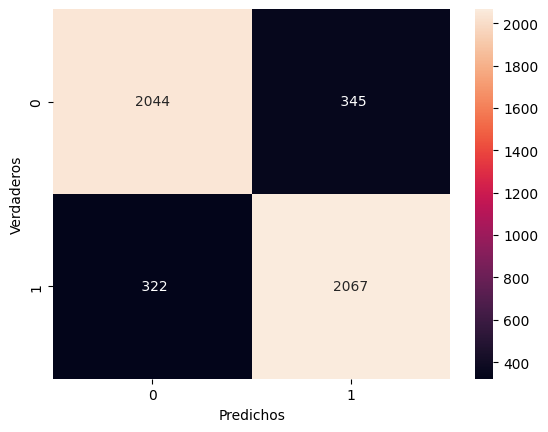

In [43]:
# Obtenemos la matriz de confusión del modelo con estandarización minmax por tener el mejor recall
matriz_confusion = confusion_matrix(y_test,y_pred_knn_minmax)

sns.heatmap(matriz_confusion, annot=True, fmt = "4d")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [44]:
# La métricas de evaluación son:
print(classification_report(y_test,y_pred_knn_minmax))



              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2389
           1       0.86      0.87      0.86      2389

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



In [45]:
print('Conclusiones:')
#Colocar conclusiones

Conclusiones:


**MODELO 3 - REGRESIÓN LOGÍSTICA**

---

In [46]:
# Entramos el modelo base
logistic = LogisticRegression()

logistic.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Calculamos los valores predichos en probabilidades y categorias
y_test_pred = logistic.predict(X_test)
y_test_pred_prob = logistic.predict_proba(X_test)

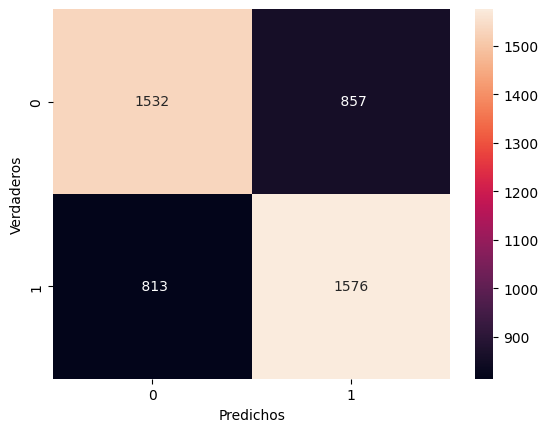

In [48]:
# Obtenemos la matriz de confusión
matriz_confusion = confusion_matrix(y_test,y_test_pred)

sns.heatmap(matriz_confusion, annot=True, fmt = "4d")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [49]:
# Calculamos los valores de evaluación del modelo base
print("Los casos de abandono en total son:", y_test.sum())
print("El accuracy es de:",round(accuracy_score(y_test,y_test_pred),2))
print("Se detectaron correctamente:",matriz_confusion[1,:2][1])
print("Se detectaron incorrectamente:",matriz_confusion[1,:2][0])
print("La sensibilidad del modelo es:",round(recall_score(y_test,y_test_pred),2))
print("El valor de F1 es:", round(f1_score(y_test,y_test_pred),2))
print("El area sobre la curva ROC es:",round(roc_auc_score(y_test,y_test_pred_prob[:,1]),2))

Los casos de abandono en total son: 2389
El accuracy es de: 0.65
Se detectaron correctamente: 1576
Se detectaron incorrectamente: 813
La sensibilidad del modelo es: 0.66
El valor de F1 es: 0.65
El area sobre la curva ROC es: 0.7


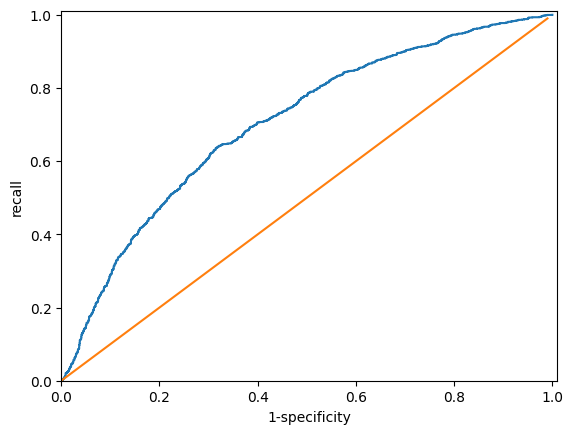

In [50]:
#Curva ROC - La relación entre la tasa de verdaderos positivos y falsos positivos -

fpr_log, tpr_log, thr_log = roc_curve(y_test,y_test_pred_prob[:,1])

curva_roc_df = pd.DataFrame(dict(fpr = fpr_log, tpr = tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.plot(curva_roc_df.fpr,curva_roc_df.tpr)
plt.xlabel('1-specificity')
plt.ylabel('recall')
plt.plot(np.arange(0,1,step = 0.01),np.arange(0,1,step = 0.01))
plt.show()

In [51]:
### Regresión Logística por GridSearch - optimizando hiperparámetro C -

parametros = {'C':[0.1,1,10,100,1000],'penalty': ['l1','l2',]}
folds = StratifiedKFold(n_splits=10, random_state = 12, shuffle = True)

In [52]:
# Instaciamos GridSearch
gridL = GridSearchCV(estimator = logistic, param_grid = parametros, scoring = 'accuracy', cv = folds, n_jobs = 2)

In [53]:
# Entrenamos el modelo con las distintas formas de estandarizar

grid_logistic_scaler = gridL.fit(X_train_scaler,y_train) # scaler
grid_logistic_robust = gridL.fit(X_train_robust,y_train) # robust
grid_logistic_minmax = gridL.fit(X_train_minmax,y_train) # minmax


C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

In [54]:
# Vemos los mejores parametros del modelo
print(gridL.best_params_)

{'C': 1, 'penalty': 'l2'}


In [55]:
# Calculamos los valores predichos

#Scaler
y_pred_logistic_scaler = grid_logistic_scaler.predict(X_test_scaler)
y_pred_proba_logistic_scaler = grid_logistic_scaler.predict_proba(X_test_scaler)

#Robust
y_pred_logistic_robust = grid_logistic_robust.predict(X_test_robust)
y_pred_proba_logistic_robust = grid_logistic_robust.predict_proba(X_test_robust)

#MinMax
y_pred_logistic_minmax = grid_logistic_minmax.predict(X_test_minmax)
y_pred_proba_logistic_minmax = grid_logistic_minmax.predict_proba(X_test_minmax)


In [56]:
# Revisamos el recall de cada modelo
print("El recall del modelo es con estandarización scaler es:",round(recall_score(y_test,y_pred_logistic_scaler),2))
print("El recall del modelo es con estandarización robust es:",round(recall_score(y_test,y_pred_logistic_robust),2))
print("El recall del modelo es con estandarización minmax es:",round(recall_score(y_test,y_pred_logistic_minmax),2))


El recall del modelo es con estandarización scaler es: 0.59
El recall del modelo es con estandarización robust es: 0.59
El recall del modelo es con estandarización minmax es: 0.7


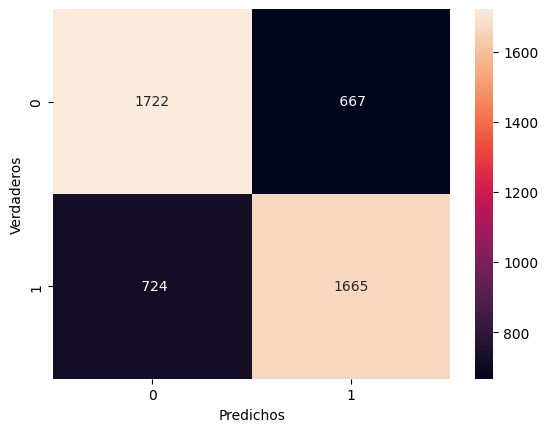

In [57]:
# Obtenemos la matriz de confusión del modelo con estandarización MinMax por tener el mejor recall
matriz_confusion = confusion_matrix(y_test,y_pred_logistic_minmax)

sns.heatmap(matriz_confusion, annot=True, fmt = "4d")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [58]:
# La métricas de evaluación son:
print(classification_report(y_test,y_pred_logistic_minmax))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2389
           1       0.71      0.70      0.71      2389

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



**MODELO 4 - Decision Tree**

---



In [59]:
# Entrenamos el modelo base
tree_base = tree.DecisionTreeClassifier()


tree_base.fit(X_train,y_train)


DecisionTreeClassifier()

In [60]:
# Calculamos los valores predichos en probabilidades y categorias en TEST Y TRAIN

# Train
y_train_pred = tree_base.predict(X_train)
y_train_pred_prob = tree_base.predict_proba(X_train)

# Test
y_test_pred = tree_base.predict(X_test)
y_test_pred_prob = tree_base.predict_proba(X_test)

In [61]:
# Comprobamos el accuracy para train y test
print("El accuracy en train es de:",round(accuracy_score(y_train,y_train_pred),2))
print("El accuracy en test es de:",round(accuracy_score(y_test,y_test_pred),2))

El accuracy en train es de: 1.0
El accuracy en test es de: 0.91


In [62]:
print('Claramente el modelo de árboles de decisión está sobreajustando a los datos de entranmientos.')

Claramente el modelo de árboles de decisión está sobreajustando a los datos de entranmientos.


In [63]:
# Usamos GridSearch para encontrar los mejores hiperparámetros y poder el árbol para evitar un ajuste excesivo.

In [64]:
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':[5,10,20,30,None],
               'max_depth':list(range(1,30)),
               'min_samples_split':[2,3,4,5,10,15,20,None]}

estimador = tree.DecisionTreeClassifier()

In [65]:
# Realizamos Grid Search para Arboles de Decisión
grid_tree = GridSearchCV(estimator = estimador, param_grid = params_grid, n_jobs = -1 , scoring = 'accuracy', cv = folds)

In [66]:
# Entrenamos el modelo
'''Sabemos que los árboles de decisión son un tipo de algoritmo 
  que no requieren que las variables de entrada X se estandaricen. Es decir,
  los árboles de decisión son capaces de manejar variables con diferentes escalas
  y unidades sin necesidad de preporcesamiento adicional.
  Sin embargo, si se utiliza algún método de selección de caracteristicas como
  el análisis de la importancia de los features, que utiliza medidas de importancia
  basadas en la variación de los features, es recomendable estandarizar
  las variables de entrada antes de aplicar el método.
  Como a nosotros nos interesa conocer la importancia de cada features sobre la estimación de churn, entrenaremos el modelo con
  las matriz X estandarizadas por scaler,robust y minmax y concluiremos el análisis de nuestro mejor árbol de decisión
  viendo la importancia de cada feature'''


grid_tree_scale = grid_tree.fit(X_train_scaler,y_train) # Scaler
grid_tree_robust = grid_tree.fit(X_train_robust, y_train) # Robust
grid_tree_minmax = grid_tree.fit(X_train_minmax,y_train) # MinMax

C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6960 fits failed out of a total of 23200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

In [67]:
# Vemos cuales son los mejores parámetros dados por Grid Search
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 24,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [68]:
# Calculamos los valores predichos

#Scaler
y_pred_tree_scaler = grid_tree_scale.predict(X_test_scaler)
y_pred_proba_tree_scaler = grid_tree_scale.predict_proba(X_test_scaler)

#Robust
y_pred_tree_robust = grid_tree_robust.predict(X_test_robust)
y_pred_proba_tree_robust = grid_tree_robust.predict_proba(X_test_robust)

#MinMax
y_pred_tree_minmax = grid_tree_minmax.predict(X_test_minmax)
y_pred_proba_tree_minmax = grid_tree_minmax.predict_proba(X_test_minmax)

In [69]:
# Revisamos el recall de cada modelo
print("El recall del modelo es con estandarización scaler es:",round(recall_score(y_test,y_pred_tree_scaler),2))
print("El recall del modelo es con estandarización robust es:",round(recall_score(y_test,y_pred_tree_robust),2))
print("El recall del modelo es con estandarización minmax es:",round(recall_score(y_test,y_pred_tree_minmax),2))

El recall del modelo es con estandarización scaler es: 0.44
El recall del modelo es con estandarización robust es: 0.4
El recall del modelo es con estandarización minmax es: 0.88


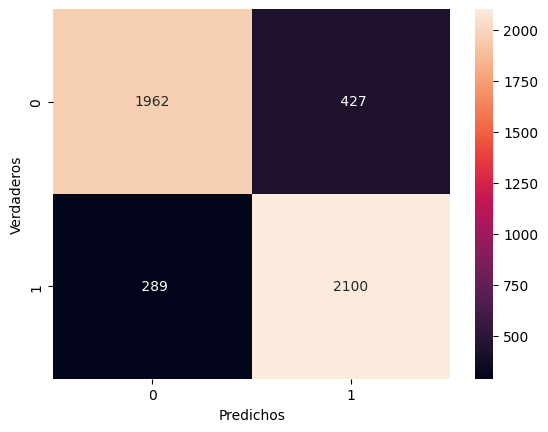

In [70]:
# Obtenemos la matriz de confusión del modelo con estandarización MinMax por tener el mejor recall
matriz_confusion = confusion_matrix(y_test,y_pred_tree_minmax)

sns.heatmap(matriz_confusion, annot=True, fmt = "4d")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [71]:
# La métricas de evaluación son:
print(classification_report(y_test,y_pred_tree_minmax))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2389
           1       0.83      0.88      0.85      2389

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



In [72]:
# Gráficamos el árbol de decisión MinMax que obtuvimos por Grid Search
from IPython.display import Image
import pydotplus

# Armo un árbol de decisión con los mejores parametros obtenidos por GridSearch
tree_optimo = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 19, min_samples_leaf= 5,min_samples_split = 10)
tree_optimo.fit(X_train,y_train)

# Armo el arbol en gráfico
dot_data = tree.export_graphviz(tree_optimo, out_file=None,feature_names= X_train.columns, filled = True) 

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [73]:
# Ahora con el árbol de Grid Search MinMax obtengo la importancia de cada feature en la estimación de churn

cv_clf = grid_tree_minmax.best_estimator_ # Paso importante de pedir el mejor estimador para la feature importance

pd.DataFrame({'atributo':X.columns, 'importancia':cv_clf.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
1,age,0.254849
3,balance,0.157487
7,estimated_salary,0.149861
4,products_number,0.141875
0,credit_score,0.128713
2,tenure,0.056591
6,active_member,0.043127
8,country_Germany,0.021772
10,gender_Male,0.021557
9,country_Spain,0.012213


**ENSAMBLE DE MODELOS**


---


RANDOM FOREST





In [74]:
# Armamos el modelo de Random Forest por Grid Search

params_grid = {'n_estimators':[100],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth' : list(range(2,20)),
               'criterion' :['gini', 'entropy'],
               'n_jobs' : [-1],
               'oob_score' : [True],
               'random_state' : [12]

               }

estimador = RandomForestClassifier()

In [75]:
# Realizamos Grid Search para Random Forest
grid_RF = GridSearchCV(estimator = estimador, param_grid = params_grid, cv = folds, scoring = 'accuracy')

In [76]:
# Entrenamos el modelo

grid_rf_scale = grid_RF.fit(X_train_scaler,y_train) # Scaler
grid_rf_robust = grid_RF.fit(X_train_robust, y_train) # Robust
grid_rf_minmax = grid_RF.fit(X_train_minmax,y_train) # MinMax


C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

In [78]:
# Vemos cuales son los mejores parámetros dados por Grid Search
grid_RF.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 12}

In [79]:
# Calculamos los valores predichos

#Scaler
y_pred_rf_scaler = grid_rf_scale.predict(X_test_scaler)
y_pred_proba_rf_scaler = grid_rf_scale.predict_proba(X_test_scaler)

#Robust
y_pred_rf_robust = grid_rf_robust.predict(X_test_robust)
y_pred_proba_rf_robust = grid_rf_robust.predict_proba(X_test_robust)

#MinMax
y_pred_rf_minmax = grid_rf_minmax.predict(X_test_minmax)
y_pred_proba_rf_minmax = grid_rf_minmax.predict_proba(X_test_minmax)

In [80]:
# Revisamos el recall de cada modelo
print("El recall del modelo es con estandarización scaler es:",round(recall_score(y_test,y_pred_rf_scaler),2))
print("El recall del modelo es con estandarización robust es:",round(recall_score(y_test,y_pred_rf_robust),2))
print("El recall del modelo es con estandarización minmax es:",round(recall_score(y_test,y_pred_rf_minmax),2))

El recall del modelo es con estandarización scaler es: 0.6
El recall del modelo es con estandarización robust es: 0.6
El recall del modelo es con estandarización minmax es: 0.98


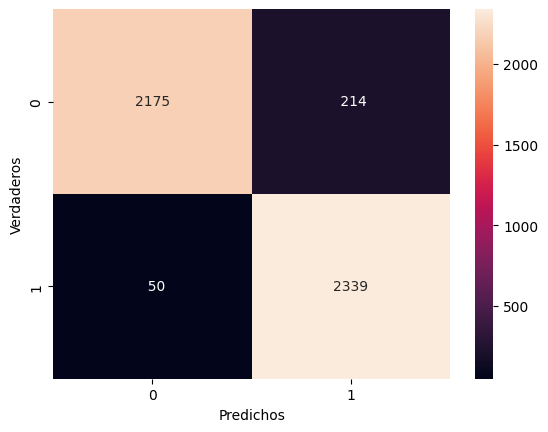

In [81]:
# Obtenemos la matriz de confusión del modelo con estandarización _____ por tener el mejor recall
matriz_confusion = confusion_matrix(y_test,y_pred_rf_minmax)

sns.heatmap(matriz_confusion, annot=True, fmt = "4d")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [82]:
# La métricas de evaluación son:
print(classification_report(y_test,y_pred_rf_minmax))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2389
           1       0.92      0.98      0.95      2389

    accuracy                           0.94      4778
   macro avg       0.95      0.94      0.94      4778
weighted avg       0.95      0.94      0.94      4778



In [83]:
# Ahora con el modelo entrenado de Random Forest obtengo la importancia de cada feature en la estimación de churn

cv_rf = grid_rf_minmax.best_estimator_ # Paso importante de pedir el mejor estimador para la feature importance

pd.DataFrame({'atributo':X.columns, 'importancia':cv_rf.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
1,age,0.254384
3,balance,0.144415
7,estimated_salary,0.135689
4,products_number,0.133543
0,credit_score,0.132612
2,tenure,0.079490
6,active_member,0.034811
8,country_Germany,0.031982
10,gender_Male,0.020636
5,credit_card,0.018611


In [84]:
print('Aquí como en árbol de decisión optimizado por Grid Search tenemos que edad es la featura más importante para predecir el churn')

Aquí como en árbol de decisión optimizado por Grid Search tenemos que edad es la featura más importante para predecir el churn



**Comparación de los modelos**

<Figure size 640x480 with 0 Axes>

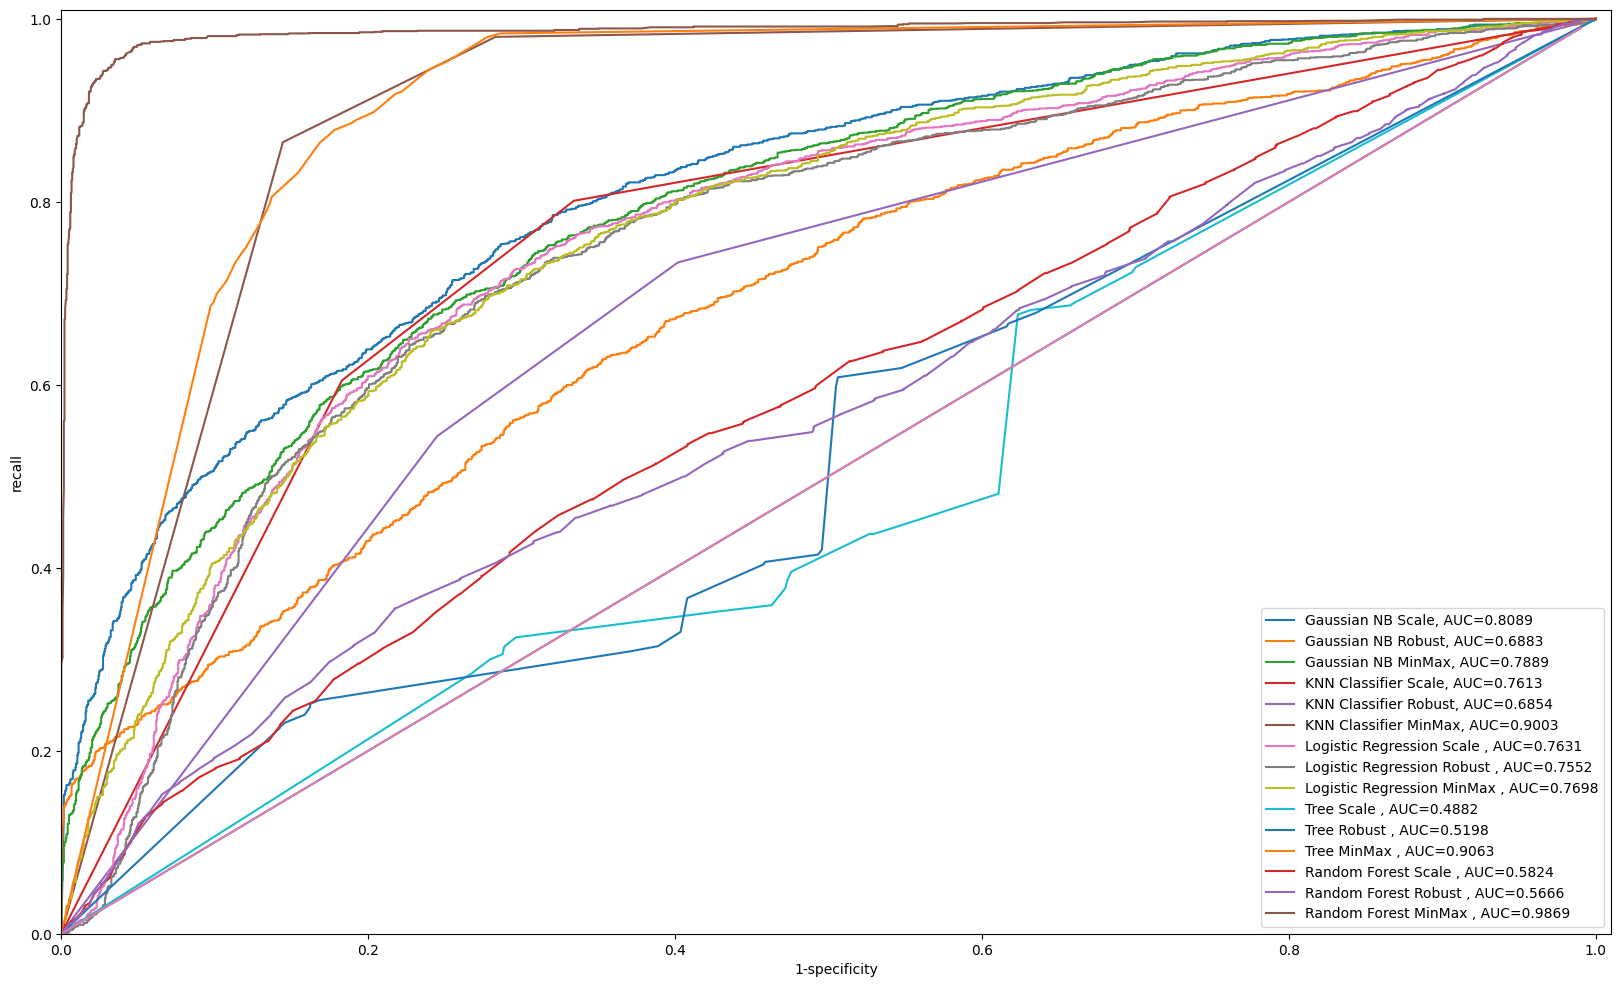

In [85]:
# Comparamos las curvas ROC

#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(20, 12))
plt.axis([0, 1.01, 0, 1.01])

# No hace falta volver a correr cada modelo, pero sí hace falta modificar y_pred_prob para que sea 1 sólo vector (1d)

# NAIVE BAYES
# Scale
y_pred_prob_naive_true_scale = y_pred_proba_naive_scaler[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_naive_true_scale)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob_naive_true_scale), 4)
plt.plot(fpr,tpr,label="Gaussian NB Scale, AUC="+str(auc))

# Robust
y_pred_prob_naive_true_robust = y_pred_proba_naive_robust[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_naive_true_robust)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob_naive_true_robust), 4)
plt.plot(fpr,tpr,label="Gaussian NB Robust, AUC="+str(auc))

# MinMax
y_pred_prob_naive_true_minmax = y_pred_proba_naive_minmax[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_naive_true_minmax)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob_naive_true_minmax), 4)
plt.plot(fpr,tpr,label="Gaussian NB MinMax, AUC="+str(auc))



# KNN
# Scale
y_pred_prob_knn_true_scale = y_pred_proba_knn_scaler[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_knn_true_scale)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob_knn_true_scale), 4)
plt.plot(fpr,tpr,label="KNN Classifier Scale, AUC="+str(auc))

# Robust
y_pred_prob_knn_true_robust = y_pred_proba_knn_robust[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_knn_true_robust)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob_knn_true_robust), 4)
plt.plot(fpr,tpr,label="KNN Classifier Robust, AUC="+str(auc))

# MinMax
y_pred_prob_knn_true_minmax= y_pred_proba_knn_minmax[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_knn_true_minmax)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob_knn_true_minmax), 4)
plt.plot(fpr,tpr,label="KNN Classifier MinMax, AUC="+str(auc))


# LOGISTIC REGRESION 
# Scale
y_pred_proba_logistic_true_scale = y_pred_proba_logistic_scaler[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_logistic_true_scale)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_logistic_true_scale), 4)
plt.plot(fpr,tpr,label="Logistic Regression Scale , AUC="+str(auc))

# Robust
y_pred_proba_logistic_true_robust = y_pred_proba_logistic_robust[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_logistic_true_robust)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_logistic_true_robust), 4)
plt.plot(fpr,tpr,label="Logistic Regression Robust , AUC="+str(auc))

# MinMax
y_pred_proba_logistic_true_minmax = y_pred_proba_logistic_minmax[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_logistic_true_minmax)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_logistic_true_minmax), 4)
plt.plot(fpr,tpr,label="Logistic Regression MinMax , AUC="+str(auc))


# Tree
# Scale
y_pred_proba_tree_true_scale = y_pred_proba_tree_scaler[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_tree_true_scale)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_tree_true_scale), 4)
plt.plot(fpr,tpr,label="Tree Scale , AUC="+str(auc))

# Robust
y_pred_proba_tree_true_robust = y_pred_proba_tree_robust[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_tree_true_robust)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_tree_true_robust), 4)
plt.plot(fpr,tpr,label="Tree Robust , AUC="+str(auc))

# MinMax
y_pred_proba_tree_true_minmax = y_pred_proba_tree_minmax[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_tree_true_minmax)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_tree_true_minmax), 4)
plt.plot(fpr,tpr,label="Tree MinMax , AUC="+str(auc))

plt.xlabel('1-specificity')
plt.ylabel('recall')
plt.plot(np.arange(0,1,step = 0.01),np.arange(0,1,step = 0.01))


# Random Forest
# Scale
y_pred_proba_rf_true_scale = y_pred_proba_rf_scaler[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf_true_scale)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_rf_true_scale), 4)
plt.plot(fpr,tpr,label="Random Forest Scale , AUC="+str(auc))

# Robust
y_pred_proba_rf_true_robust = y_pred_proba_rf_robust[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf_true_robust)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_rf_true_robust), 4)
plt.plot(fpr,tpr,label="Random Forest Robust , AUC="+str(auc))

# MinMax
y_pred_proba_rf_true_minmax = y_pred_proba_rf_minmax[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf_true_minmax)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba_rf_true_minmax), 4)
plt.plot(fpr,tpr,label="Random Forest MinMax , AUC="+str(auc))

plt.xlabel('1-specificity')
plt.ylabel('recall')
plt.plot(np.arange(0,1,step = 0.01),np.arange(0,1,step = 0.01))


#add legend
plt.legend()
plt.show()



In [86]:
print('Para esclarecer la curva ROC, armamos un cuadro de resumen para los accuracy de cada modelo')

Para esclarecer la curva ROC, armamos un cuadro de resumen para los accuracy de cada modelo


In [91]:
# Resumen de accuracy en los modelos
diccionario_accuracy = dict([
('Logistic_standard',round(accuracy_score(y_test,y_pred_logistic_scaler),2)),
('Logistic_robust',round(accuracy_score(y_test,y_pred_logistic_robust),2)),
('Logistic_minmax',round(accuracy_score(y_test,y_pred_logistic_minmax),2)),
('KNN_standard',round(accuracy_score(y_test,y_pred_knn_scaler),2)),
('KNN_robust',round(accuracy_score(y_test,y_pred_knn_robust),2)),                                                                                                                                                                          
('KNN_minmax',round(accuracy_score(y_test,y_pred_knn_minmax),2)),  
('Naive_standard',round(accuracy_score(y_test,y_pred_naive_scaler),2)),
('Naive_robust',round(accuracy_score(y_test,y_pred_naive_robust),2)),
('Naive_minmax',round(accuracy_score(y_test,y_pred_naive_minmax),2)),
('Tree_standard',round(accuracy_score(y_test,y_pred_tree_scaler),2)),
('Tree_robust',round(accuracy_score(y_test,y_pred_tree_robust),2)),
('Tree_minmax',round(accuracy_score(y_test,y_pred_tree_minmax),2)),
('RandomForest_standard',round(accuracy_score(y_test,y_pred_rf_scaler),2)),
('RandomForest_robust',round(accuracy_score(y_test,y_pred_rf_robust),2)),
('RandomForest_minmax',round(accuracy_score(y_test,y_pred_rf_minmax),2))])


In [92]:
# Armamos el data frame del resumen de accuracy
resumen_accuracy = pd.DataFrame.from_dict(data = diccionario_accuracy, orient = 'index', columns = ["Accuracy Score"])

In [93]:
# Ordenamos de mayor a menor y mostramos los 5 mejores modelos 
resumen_accuracy.sort_values(by =['Accuracy Score'] ,ascending=False).head(5)

,Accuracy Score
RandomForest_minmax,0.94
KNN_minmax,0.86
Tree_minmax,0.85
Naive_minmax,0.72
Logistic_minmax,0.71


**Conclusiones finales**

In [90]:
'''
El mejor modelo resultó ser el de Random Forest estandarizando la matriz de features con MinMaxScaler.
Esta estandarización se utiliza para escalar los datos entre un rango especifico (por lo general
0 y 1) y es adecuado para conjuntos de datos que no siguen una distribución normal.
Random Forest sabemos que es un modelo que mejora el rendimiento de las predecciones -generalmente-
pero a expensas de un aumento en el sesgo.

Por otro lado, en Random Forest como en Decision Tree obtuvimos que la variable age es la más 
importante para predecir el churn en los clientes bancarios. Esto también lo habiamos notado en el análisis
descriptivo de datos inicial. Es decir, personas de mayor edad son más propensas a abandonar.
En segundo lugar de importancia está el balance. Esto puede desprender acciones comerciales importantes.
Como por ejemplo acciones retención sobre dos segmentos:
                 clientes con alto balance y jóvenes & alto balance y clientes mayores

                 
Próximos pasos:                 
A futuro consideramos que es apropiado introducir un pipeline para ir realizando Grid Search
usando cada estandarización en el proceso de entranamiento. Haciendo más legible al script.

'''

'\nEl mejor modelo resultó ser el de Random Forest estandarizando la matriz de features con MinMaxScaler.\nEsta estandarización se utiliza para escalar los datos entre un rango especifico (por lo general\n0 y 1) y es adecuado para conjuntos de datos que no siguen una distribución normal.\nRandom Forest sabemos que es un modelo que mejora el rendimiento de las predecciones -generalmente-\npero a expensas de un aumento en el sesgo.\n\nPor otro lado, en Random Forest como en Decision Tree obtuvimos que la variable age es la más \nimportante para predecir el churn en los clientes bancarios. Esto también lo habiamos notado en el análisis\ndescriptivo de datos inicial. Es decir, personas de mayor edad son más propensas a abandonar.\nEn segundo lugar de importancia está el balance. Esto puede desprender acciones comerciales importantes.\nComo por ejemplo acciones retención sobre dos segmentos:\n                 clientes con alto balance y jóvenes & alto balance y clientes mayores\n\n         